# Quick Algorithm Comparison

One of the best features of the Quick API is how easy it is to switch between algorithms. 
This notebook demonstrates running **NSGA-II**, **MOEA/D**, and **SPEA2** on the same problem to compare their performance.

In [1]:
from vamos import run_nsgaii, run_moead, run_spea2
import matplotlib.pyplot as plt

problem_name = "zdt1"
evals = 5000
pop = 100
seed = 42

## 1. Run NSGA-II

In [2]:
print("Running NSGA-II...")
res_nsgaii = run_nsgaii(problem_name, max_evaluations=evals, pop_size=pop, seed=seed)
res_nsgaii.summary()

Running NSGA-II...
=== VAMOS Quick Result ===
Algorithm: NSGAII
Solutions: 100
Objectives: 2
Evaluations: 5000
Seed: 42

Objective ranges:
  f1: [0.000001, 0.959684]
  f2: [0.136812, 1.774701]

Hypervolume (auto ref): 1.552366


## 2. Run MOEA/D

In [3]:
print("Running MOEA/D...")
res_moead = run_moead(problem_name, max_evaluations=evals, pop_size=pop, seed=seed)
print(f"MOEA/D found {len(res_moead)} solutions")

Running MOEA/D...
MOEA/D found 63 solutions


## 3. Run SPEA2

In [4]:
print("Running SPEA2...")
res_spea2 = run_spea2(problem_name, max_evaluations=evals, pop_size=pop, seed=seed)
print(f"SPEA2 found {len(res_spea2)} solutions")

Running SPEA2...
SPEA2 found 100 solutions


## 4. Visual Comparison
Let's plot all three fronts on the same axes.

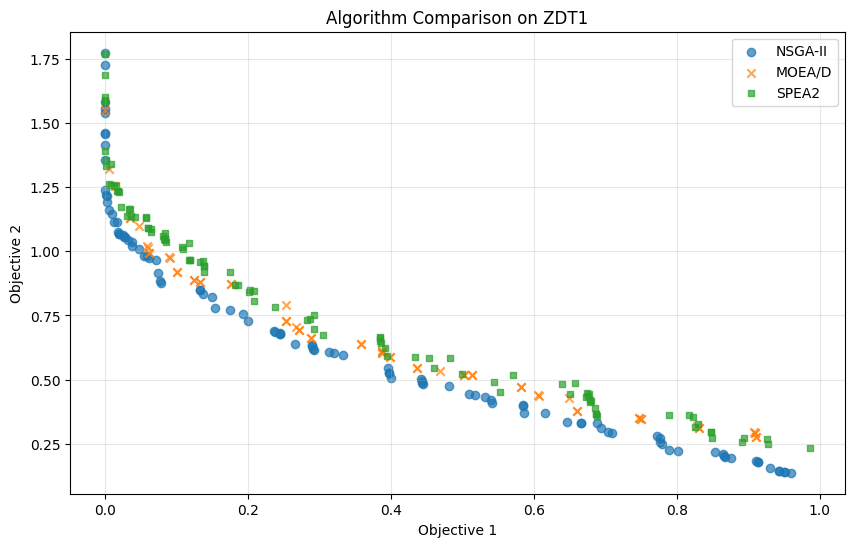

In [5]:
plt.figure(figsize=(10, 6))

plt.scatter(res_nsgaii.F[:, 0], res_nsgaii.F[:, 1], label="NSGA-II", alpha=0.7)
plt.scatter(res_moead.F[:, 0], res_moead.F[:, 1], label="MOEA/D", alpha=0.7, marker="x")
plt.scatter(res_spea2.F[:, 0], res_spea2.F[:, 1], label="SPEA2", alpha=0.7, marker="s", s=20)

plt.title(f"Algorithm Comparison on {problem_name.upper()}")
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()